# China Cheng Xin Capstone Project

<h4>Contributer: Dawei Zhang, Jiahe Hou, Yuan Xin</h4>

<h2>Packages</h2>

In [158]:
# packages
import pandas as pd
import numpy as np
import re
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from numpy import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,roc_auc_score,f1_score,classification_report,roc_auc_score,roc_curve,auc
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pylab as pl
import matplotlib.font_manager as fm
import matplotlib 
%matplotlib inline

<h2>Data Visualization</h2>

In [27]:
behavior = pd.read_csv('Behavior_train.csv', encoding='gb2312') ###### YOU CAN READ THE BEHAVIOR DATASET HERE ########
behavior.head()

/Users/jiahehou/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ccx_id,age,gender,MobileProv,MobileCity,idno_prov,idno_city,is_sh,is_mngt,is_gt,...,TRA_Share_Bike_uninstall_2M_3M,TRA_Traffic_Law_all_0M_1M,TRA_Traffic_Law_all_1M_2M,TRA_Traffic_Law_all_2M_3M,TRA_Traffic_Law_installing_0M_1M,TRA_Traffic_Law_installing_1M_2M,TRA_Traffic_Law_installing_2M_3M,TRA_Traffic_Law_uninstall_0M_1M,TRA_Traffic_Law_uninstall_1M_2M,TRA_Traffic_Law_uninstall_2M_3M
0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,28,男,上海,上海,福建省,漳州市,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,40,女,广东,湛江市,广东省,湛江市,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,21,女,浙江,杭州市,陕西省,西安市,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,33,女,浙江,杭州市,河南省,驻马店市,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Province distribution</h3>

In [28]:
province = behavior.groupby(['MobileProv']).size().sort_values(ascending=False)
province

MobileProv
广东     3410
浙江     1899
江苏     1694
四川     1165
福建     1123
山东      965
湖北      956
河南      941
广西      742
上海      735
河北      679
湖南      668
北京      645
云南      563
安徽      528
江西      512
辽宁      471
陕西      470
山西      455
重庆      421
贵州      369
黑龙江     305
甘肃      235
吉林      234
内蒙古     222
海南      199
天津      180
宁夏       76
新疆       71
青海       42
西藏        7
dtype: int64

<h3>Gender distribution</h3>

Text(0.5,1,'Distribution of Gender')

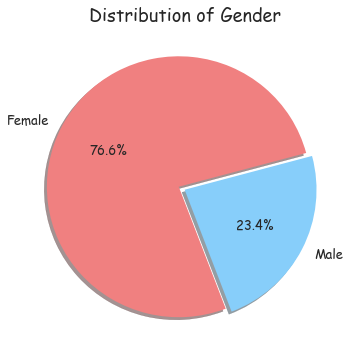

In [254]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
behavior["gender"].value_counts().plot.pie(autopct = "%1.1f%%",colors = ["lightcoral","lightskyblue"],
                                        labels=["Female","Male"],startangle = 15,explode=[.05,0],shadow =True,fontsize=13)
pl.ylabel('')
plt.title("Distribution of Gender",fontsize=18)

<h3>Age distribution</h3>

Text(0,0.5,'Count')

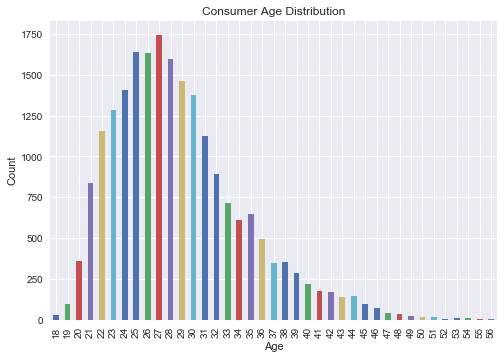

In [31]:
plt.style.use('seaborn')
age = behavior.groupby(['age'])
ax =age.size().plot(kind='bar',title = "Consumer Age Distribution")
ax.set_xlabel("Age")
ax.set_ylabel("Count")

<h3>Province distribution in purchase history dataset</h3>

In [87]:
consumer = pd.read_csv('Consumer_train.csv',encoding = 'utf-8') ###### YOU CAN READ THE PURCHASE DATASET HERE ########
consumer.head()

,ccx_id,province,city,area,fare,goodsvalue,orderamount,paymenttime,platform,refund,discount,ordertime,deliveryNum,unitPrice,goodsName
0,1,山东,济宁,任城,10.0,38.0,48.0,2015/6/4 9:41,淘宝分销,0.0,0.0,0000-00-00 00:00:00,1.0,38.0,书籍/杂志/报纸
1,1,山东,济宁,任城,10.0,38.0,48.0,2015/6/4 9:41,淘宝分销,0.0,0.0,2015/6/3 23:04,1.0,38.0,书籍/杂志/报纸
2,1,江苏,徐州,新沂,0.0,25.0,25.0,2015/11/28 20:36,淘宝,0.0,0.0,0000-00-00 00:00:00,1.0,25.0,书籍/杂志/报纸
3,1,江苏,徐州,新沂,0.0,49.5,49.5,2014/7/9 10:08,淘宝,0.0,0.0,0000-00-00 00:00:00,1.0,49.5,女士内衣/男士内衣/家居服
4,1,江苏,徐州,新沂,0.0,12.8,12.8,2016/10/14 22:16,淘宝,0.0,27.0,2016/10/14 22:16,1.0,12.8,书籍/杂志/报纸


In [35]:
province2 = consumer.groupby(['province']).size().sort_values(ascending=False)
province2

province
广东     54109
浙江     45113
江苏     39312
上海     31092
福建     21635
山东     18591
四川     17528
湖北     15906
河南     15750
北京     14624
湖南     12641
河北     12616
云南     10976
广西     10842
安徽      9909
江西      9600
辽宁      8682
陕西      8033
重庆      7182
山西      6993
贵州      6581
黑龙江     5419
天津      4930
吉林      4084
内蒙古     3927
甘肃      3546
海南      3249
宁夏      1117
新疆      1109
青海       654
NON      483
西藏       133
香港         1
dtype: int64

<h2>Data Cleaning and Preparation</h2>

<h3>Behavioral dataset:</h3>
1. <h4>combine features</h4>
    - leave only the "all" columns (delete "installing" and "uninstall")
    - sum up each "all" category 
    - delete coumns with 1M-2M and 2M-3M
- <h4>rename columns to make them easy to read</h4>
- <h4>combine features that fall into same category</h4>
- <h4>quantify some features such as location, education, career level</h4>

In [36]:
# deleting columns with string "installing" and "uninstall"
def delete_extra(df):
    pattern1 = r'_installing_'
    pattern2 = r'_uninstall_'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern1, i)
        if match:
            df.drop(i, axis=1, inplace=True)
    for i in colnames:
        match = re.search(pattern2, i)
        if match:
            df.drop(i, axis=1, inplace=True)
    return df

In [37]:
new_behavior = delete_extra(behavior)

In [38]:
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'result',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_NAME',
 'SCHOOL_TYPE',
 'MAJOR',
 'ENROLLMENT_DATE',
 'GRADUATION_DATE',
 'GRADUATION_CONTENT',
 'recall_date',
 'ASSETS_Own_Car_all_0M_1M',
 'ASSETS_Own_Car_all_1M_2M',
 'ASSETS_Own_Car_all_2M_3M',
 'ASSETS_Own_House_all_0M_1M',
 'ASSETS_Own_House_all_1M_2M',
 'ASSETS_Own_House_all_2M_3M',
 'ASSETS_Rent_House_all_0M_1M',
 'ASSETS_Rent_House_all_1M_2M',
 'ASSETS_Rent_House_all_2M_3M',
 'BOOK_Comic_all_0M_1M',
 'BOOK_Comic_all_1M_2M',
 'BOOK_Comic_all_2M_3M',
 'BOOK_Novel_Fantasy_all_0M_1M',
 'BOOK_Novel_Fantasy_all_1M_2M',
 'BOOK_Novel_Fantasy_all_2M_3M',
 'BOOK_Novel_Romance_all_0M_1M',
 'BOOK_Novel_Romance_all_1M_2M',
 'BOOK_Novel_Romance_all_2M_3M',
 'BOOK_Novel_all_0M_1M',
 'BOOK_Novel_all_1M_2M',
 'BOOK_Novel_all_2M_3M',
 'BUS_BusinessCard_all_0M_1M',
 'BUS_BusinessCard_all_1M_2M',
 'BUS_BusinessCard_all_2M_3M',
 'BU

In [39]:
# sum up three peroid to 0M-1M for each category
def add_all(df):
    pattern = r'_all_0M_1M'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern, i)
        if match: 
            index = df.columns.get_loc(i)
            df[i] = df.iloc[:, index:(index+3)].sum(axis=1)
    return df

In [40]:
new_behavior = add_all(new_behavior)

In [41]:
# delete columns with the “all_1M_2M” tag
def delete_all_12(df):
    pattern = r'_all_1M_2M'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern, i)
        if match:
            df.drop(i, axis=1, inplace=True)
    return df

In [42]:
new_behavior = delete_all_12(new_behavior)
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'result',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_NAME',
 'SCHOOL_TYPE',
 'MAJOR',
 'ENROLLMENT_DATE',
 'GRADUATION_DATE',
 'GRADUATION_CONTENT',
 'recall_date',
 'ASSETS_Own_Car_all_0M_1M',
 'ASSETS_Own_Car_all_2M_3M',
 'ASSETS_Own_House_all_0M_1M',
 'ASSETS_Own_House_all_2M_3M',
 'ASSETS_Rent_House_all_0M_1M',
 'ASSETS_Rent_House_all_2M_3M',
 'BOOK_Comic_all_0M_1M',
 'BOOK_Comic_all_2M_3M',
 'BOOK_Novel_Fantasy_all_0M_1M',
 'BOOK_Novel_Fantasy_all_2M_3M',
 'BOOK_Novel_Romance_all_0M_1M',
 'BOOK_Novel_Romance_all_2M_3M',
 'BOOK_Novel_all_0M_1M',
 'BOOK_Novel_all_2M_3M',
 'BUS_BusinessCard_all_0M_1M',
 'BUS_BusinessCard_all_2M_3M',
 'BUS_Calculator_all_0M_1M',
 'BUS_Calculator_all_2M_3M',
 'BUS_Note_all_0M_1M',
 'BUS_Note_all_2M_3M',
 'BUS_Reader_all_0M_1M',
 'BUS_Reader_all_2M_3M',
 'BUS_Soft_Communication&Meeting_all_0M_1M',
 'BUS_Soft_Communication&Meeting_all_2M_3M',

In [43]:
# delete columns with the "all_2M_3M" tag
def delete_all_23(df):
    pattern = r'_all_2M_3M'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern, i)
        if match:
            df.drop(i, axis=1, inplace=True)
    return df
new_behavior = delete_all_23(new_behavior)

In [44]:
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'result',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_NAME',
 'SCHOOL_TYPE',
 'MAJOR',
 'ENROLLMENT_DATE',
 'GRADUATION_DATE',
 'GRADUATION_CONTENT',
 'recall_date',
 'ASSETS_Own_Car_all_0M_1M',
 'ASSETS_Own_House_all_0M_1M',
 'ASSETS_Rent_House_all_0M_1M',
 'BOOK_Comic_all_0M_1M',
 'BOOK_Novel_Fantasy_all_0M_1M',
 'BOOK_Novel_Romance_all_0M_1M',
 'BOOK_Novel_all_0M_1M',
 'BUS_BusinessCard_all_0M_1M',
 'BUS_Calculator_all_0M_1M',
 'BUS_Note_all_0M_1M',
 'BUS_Reader_all_0M_1M',
 'BUS_Soft_Communication&Meeting_all_0M_1M',
 'BUS_Soft_Document_all_0M_1M',
 'BUS_Soft_Efficient_all_0M_1M',
 'BUS_Software_all_0M_1M',
 'DEVICE_Stability_0M_1M',
 'DEVICE_Stability_1M_2M',
 'DEVICE_Stability_2M_3M',
 'Device_Cpu_Info_cnt',
 'Device_Language_cnt',
 'Device_OS_Version_cnt',
 'Device_Resolution_cnt',
 'Device_Screen_Size_cnt',
 'Device_time_zone_cnt',
 'EDU_Books_all_0M_1M',
 'EDU_Child

In [45]:
# change column names where has "all_0M_1M" (delete this tag)
def rename(df):
    pattern = r'_all_0M_1M'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern, i)
        if match:
            df.rename(columns={i:i[:-10]}, inplace=True)
    return df

In [46]:
new_behavior = rename(new_behavior)
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'result',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_NAME',
 'SCHOOL_TYPE',
 'MAJOR',
 'ENROLLMENT_DATE',
 'GRADUATION_DATE',
 'GRADUATION_CONTENT',
 'recall_date',
 'ASSETS_Own_Car',
 'ASSETS_Own_House',
 'ASSETS_Rent_House',
 'BOOK_Comic',
 'BOOK_Novel_Fantasy',
 'BOOK_Novel_Romance',
 'BOOK_Novel',
 'BUS_BusinessCard',
 'BUS_Calculator',
 'BUS_Note',
 'BUS_Reader',
 'BUS_Soft_Communication&Meeting',
 'BUS_Soft_Document',
 'BUS_Soft_Efficient',
 'BUS_Software',
 'DEVICE_Stability_0M_1M',
 'DEVICE_Stability_1M_2M',
 'DEVICE_Stability_2M_3M',
 'Device_Cpu_Info_cnt',
 'Device_Language_cnt',
 'Device_OS_Version_cnt',
 'Device_Resolution_cnt',
 'Device_Screen_Size_cnt',
 'Device_time_zone_cnt',
 'EDU_Books',
 'EDU_Child',
 'EDU_Exams',
 'EDU_Language',
 'EDU_Online',
 'EDU_STUDY_Invest',
 'EDU_Student',
 'FIN_Bank_Creditcard',
 'FIN_Bank_Creditcard_avg_usetime_0M_1M',
 'FIN_Ba

In [47]:
# further cleaning: delete columns with "_0W_1W"
def delete_01w(df):
    pattern = r'_0W_1W'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern, i)
        if match:
            df.drop(i, axis=1, inplace=True)
    return df
new_behavior = delete_01w(new_behavior)

In [48]:
# add all values to 0M-1M (for those columns with slightly different names)
def add_to01(df):
    pattern = r'_0M_1M'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern, i)
        if match: 
            index = df.columns.get_loc(i)
            df[i] = df.iloc[:, index:(index+3)].sum(axis=1)
    return df
new_behavior = add_to01(new_behavior)

In [49]:
# delete columns with "1M-2M", "2M-3M" again
def delete_12_23(df):
    pattern1 = r'_1M_2M'
    pattern2 = r'_2M_3M'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern1, i)
        if match:
            df.drop(i, axis=1, inplace=True)
    for i in colnames:
        match = re.search(pattern2, i)
        if match:
            df.drop(i, axis=1, inplace=True)
    return df
new_behavior = delete_12_23(new_behavior)
new_behavior

,ccx_id,age,gender,MobileProv,MobileCity,idno_prov,idno_city,is_sh,is_mngt,is_gt,...,TRA_Car_DrivingService,TRA_Car_Moving,TRA_Car_Rental,TRA_Car_Special,TRA_Car_Taxi,TRA_Car,TRA_Guide,TRA_Map_GPS,TRA_Share_Bike,TRA_Traffic_Law
0,1,26,male,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,28,male,上海,上海,福建省,漳州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
2,4,40,female,广东,湛江市,广东省,湛江市,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,21,female,浙江,杭州市,陕西省,西安市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
4,10,33,female,浙江,杭州市,河南省,驻马店市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15,27,male,北京,北京,江苏省,镇江市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,17,37,female,浙江,金华市,浙江省,金华市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,19,43,female,广东,湛江市,黑龙江省,七台河市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,25,21,female,上海,上海,四川省,巴中市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
9,26,37,female,广西,梧州市,广西壮族自治区,梧州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# rename the feature again
def rename(df):
    pattern = r'_0M_1M'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern, i)
        if match:
            df.rename(columns={i:i[:-6]}, inplace=True)
    return df
new_behavior = rename(new_behavior)
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'result',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_NAME',
 'SCHOOL_TYPE',
 'MAJOR',
 'ENROLLMENT_DATE',
 'GRADUATION_DATE',
 'GRADUATION_CONTENT',
 'recall_date',
 'ASSETS_Own_Car',
 'ASSETS_Own_House',
 'ASSETS_Rent_House',
 'BOOK_Comic',
 'BOOK_Novel_Fantasy',
 'BOOK_Novel_Romance',
 'BOOK_Novel',
 'BUS_BusinessCard',
 'BUS_Calculator',
 'BUS_Note',
 'BUS_Reader',
 'BUS_Soft_Communication&Meeting',
 'BUS_Soft_Document',
 'BUS_Soft_Efficient',
 'BUS_Software',
 'DEVICE_Stability',
 'Device_Cpu_Info_cnt',
 'Device_Language_cnt',
 'Device_OS_Version_cnt',
 'Device_Resolution_cnt',
 'Device_Screen_Size_cnt',
 'Device_time_zone_cnt',
 'EDU_Books',
 'EDU_Child',
 'EDU_Exams',
 'EDU_Language',
 'EDU_Online',
 'EDU_STUDY_Invest',
 'EDU_Student',
 'FIN_Bank_Creditcard',
 'FIN_Bank_Creditcard_avg_usetime',
 'FIN_Bank_Creditcard_total_open',
 'FIN_Bank_Creditcard_total_time',
 'FI

In [51]:
new_behavior

,ccx_id,age,gender,MobileProv,MobileCity,idno_prov,idno_city,is_sh,is_mngt,is_gt,...,TRA_Car_DrivingService,TRA_Car_Moving,TRA_Car_Rental,TRA_Car_Special,TRA_Car_Taxi,TRA_Car,TRA_Guide,TRA_Map_GPS,TRA_Share_Bike,TRA_Traffic_Law
0,1,26,male,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,28,male,上海,上海,福建省,漳州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
2,4,40,female,广东,湛江市,广东省,湛江市,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,21,female,浙江,杭州市,陕西省,西安市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
4,10,33,female,浙江,杭州市,河南省,驻马店市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15,27,male,北京,北京,江苏省,镇江市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,17,37,female,浙江,金华市,浙江省,金华市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,19,43,female,广东,湛江市,黑龙江省,七台河市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,25,21,female,上海,上海,四川省,巴中市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
9,26,37,female,广西,梧州市,广西壮族自治区,梧州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# delete trivial columns 
new_behavior = new_behavior.drop(['SCHOOL_NAME'], axis = 1)
new_behavior = new_behavior.drop(['MAJOR'], axis = 1)
new_behavior = new_behavior.drop(['ENROLLMENT_DATE'], axis = 1)
new_behavior = new_behavior.drop(['GRADUATION_DATE'], axis = 1)
new_behavior = new_behavior.drop(['GRADUATION_CONTENT'], axis = 1)
new_behavior = new_behavior.drop(['recall_date'], axis = 1)
new_behavior = new_behavior.drop(['result'], axis = 1)
new_behavior

,ccx_id,age,gender,MobileProv,MobileCity,idno_prov,idno_city,is_sh,is_mngt,is_gt,...,TRA_Car_DrivingService,TRA_Car_Moving,TRA_Car_Rental,TRA_Car_Special,TRA_Car_Taxi,TRA_Car,TRA_Guide,TRA_Map_GPS,TRA_Share_Bike,TRA_Traffic_Law
0,1,26,male,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,28,male,上海,上海,福建省,漳州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
2,4,40,female,广东,湛江市,广东省,湛江市,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,21,female,浙江,杭州市,陕西省,西安市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
4,10,33,female,浙江,杭州市,河南省,驻马店市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15,27,male,北京,北京,江苏省,镇江市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,17,37,female,浙江,金华市,浙江省,金华市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,19,43,female,广东,湛江市,黑龙江省,七台河市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,25,21,female,上海,上海,四川省,巴中市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
9,26,37,female,广西,梧州市,广西壮族自治区,梧州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_TYPE',
 'ASSETS_Own_Car',
 'ASSETS_Own_House',
 'ASSETS_Rent_House',
 'BOOK_Comic',
 'BOOK_Novel_Fantasy',
 'BOOK_Novel_Romance',
 'BOOK_Novel',
 'BUS_BusinessCard',
 'BUS_Calculator',
 'BUS_Note',
 'BUS_Reader',
 'BUS_Soft_Communication&Meeting',
 'BUS_Soft_Document',
 'BUS_Soft_Efficient',
 'BUS_Software',
 'DEVICE_Stability',
 'Device_Cpu_Info_cnt',
 'Device_Language_cnt',
 'Device_OS_Version_cnt',
 'Device_Resolution_cnt',
 'Device_Screen_Size_cnt',
 'Device_time_zone_cnt',
 'EDU_Books',
 'EDU_Child',
 'EDU_Exams',
 'EDU_Language',
 'EDU_Online',
 'EDU_STUDY_Invest',
 'EDU_Student',
 'FIN_Bank_Creditcard',
 'FIN_Bank_Creditcard_avg_usetime',
 'FIN_Bank_Creditcard_total_open',
 'FIN_Bank_Creditcard_total_time',
 'FIN_Bank_Type_Commercial',
 'FIN_Bank_Type_Foreign',
 'FIN_Bank_Type_Industrial',
 'FIN_Bank_Type_Internet',
 'FIN_Ban

In [54]:
# drop sparse columns
new_behavior = new_behavior.drop(['BOOK_Comic'], axis = 1)
new_behavior = new_behavior.drop(['BOOK_Novel_Fantasy'], axis = 1)
new_behavior = new_behavior.drop(['BOOK_Novel_Romance'], axis = 1)
new_behavior = new_behavior.drop(['BOOK_Novel'], axis = 1)

In [55]:
# sum all business-related categories together to form a new feature "bus_deg" and delete those categories 
bus_list = ['BUS_BusinessCard', 'BUS_Calculator', 'BUS_Note',
            'BUS_Reader', 'BUS_Soft_Communication&Meeting', 
            'BUS_Soft_Document','BUS_Soft_Efficient','BUS_Software']
new_behavior['bus_deg'] = new_behavior[bus_list].sum(axis=1)
for i in bus_list:
    new_behavior = new_behavior.drop([i], axis = 1)

In [57]:
# sum all education-related categories together to form a new feature "edu_deg" and delete those categories 
edu_list = ['EDU_Books',
 'EDU_Child',
 'EDU_Exams',
 'EDU_Language',
 'EDU_Online',
 'EDU_STUDY_Invest',
 'EDU_Student']
new_behavior['edu_deg'] = new_behavior[edu_list].sum(axis=1)
for i in edu_list:
    new_behavior = new_behavior.drop([i], axis = 1)

In [59]:
# sum all loan-related categories together to form a new feature "loan_deg" and delete those categories 
loan_related = ['FIN_Invest_Loan',
 'FIN_Invest_Loan_avg_usetime',
 'FIN_Invest_Loan_total_open',
 'FIN_Invest_Loan_total_time', 'FIN_Loan_Car',
 'FIN_Loan_Cash',
 'FIN_Loan_Cash_avg_usetime',
 'FIN_Loan_Cash_total_open',
 'FIN_Loan_Cash_total_time',
 'FIN_Loan_Consumer',
 'FIN_Loan_Consumer_avg_usetime',
 'FIN_Loan_Consumer_total_open',
 'FIN_Loan_Consumer_total_time',
 'FIN_Loan_CreditCard',
 'FIN_Loan_CreditCard_avg_usetime',
 'FIN_Loan_CreditCard_total_open',
 'FIN_Loan_CreditCard_total_time',
 'FIN_Loan_House',
 'FIN_Loan_House_avg_usetime',
 'FIN_Loan_House_total_open',
 'FIN_Loan_House_total_time',
 'FIN_Loan_Mortgage',
 'FIN_Loan_Mortgage_avg_usetime',
 'FIN_Loan_Mortgage_total_open',
 'FIN_Loan_Mortgage_total_time',
 'FIN_Loan_Other',
 'FIN_Loan_Other_avg_usetime',
 'FIN_Loan_Other_total_open',
 'FIN_Loan_Other_total_time',
 'FIN_Loan_P2P',
 'FIN_Loan_P2P_avg_usetime',
 'FIN_Loan_P2P_total_open',
 'FIN_Loan_P2P_total_time',
 'FIN_Loan_Plantform',
 'FIN_Loan_Plantform_avg_usetime',
 'FIN_Loan_Plantform_total_open',
 'FIN_Loan_Plantform_total_time',
 'FIN_Loan_Small',
 'FIN_Loan_Small_avg_usetime',
 'FIN_Loan_Small_total_open',
 'FIN_Loan_Small_total_time',
 'FIN_Loan_Student',
 'FIN_Loan_Student_avg_usetime',
 'FIN_Loan_Student_total_open',
 'FIN_Loan_Student_total_time',
 'FIN_Loan',
 'FIN_Loan_avg_usetime',
 'FIN_Loan_total_open',
 'FIN_Loan_total_time',
 'FIN_Tool_HouseLoan',
 'FIN_Tool_Insurance',
 'FIN_Tool_LoanCalculator']
new_behavior['loan_deg'] = new_behavior[loan_related].sum(axis=1)
for i in loan_related:
    new_behavior = new_behavior.drop([i], axis = 1)

In [61]:
# sum all other-finance-related categories together to form a new feature "fin_deg" and delete those categories 
fin_related = ['FIN_Bank_Creditcard',
 'FIN_Bank_Creditcard_avg_usetime',
 'FIN_Bank_Creditcard_total_open',
 'FIN_Bank_Creditcard_total_time',
 'FIN_Bank_Type_Commercial',
 'FIN_Bank_Type_Foreign',
 'FIN_Bank_Type_Industrial',
 'FIN_Bank_Type_Internet',
 'FIN_Bank_Type_Internet_avg_usetime',
 'FIN_Bank_Type_Internet_total_open',
 'FIN_Bank_Type_Internet_total_time',
 'FIN_Bank_Type_Rural',
 'FIN_Bank_Type_Rural_avg_usetime',
 'FIN_Bank_Type_Rural_total_open',
 'FIN_Bank_Type_Rural_total_time',
 'FIN_Bank_Type_ShareCommercial',
 'FIN_Bank_Type_Sharehold',
 'FIN_Bank_Type_StateCommercial',
 'FIN_Bank_Type_TownCredit',
 'FIN_Bank_Type_Town',
 'FIN_Bank_Type_Urban',
 'FIN_Bank_Type_Urban_avg_usetime',
 'FIN_Bank_Type_Urban_total_open',
 'FIN_Bank_Type_Urban_total_time',
 'FIN_Bank',
 'FIN_Bank_avg_usetime',
 'FIN_Bank_total_open',
 'FIN_Bank_total_time',
 'FIN_Debit_PCT',
 'FIN_Finance',
 'FIN_Finance_avg_usetime',
 'FIN_Finance_total_open',
 'FIN_Finance_total_time',
 'FIN_Invest_PCT',
 'FIN_Investing',
 'FIN_Investing_avg_usetime',
 'FIN_Investing_total_open',
 'FIN_Investing_total_time',
 'FIN_Payment_Credit',
 'FIN_Payment_Credit_avg_usetime',
 'FIN_Payment_Credit_total_open',
 'FIN_Payment_Credit_total_time',
 'FIN_Payment_General',
 'FIN_Payment_General_avg_usetime',
 'FIN_Payment_General_total_open',
 'FIN_Payment_General_total_time',
 'FIN_Payment_NFC',
 'FIN_Payment_NFC_avg_usetime',
 'FIN_Payment_NFC_total_open',
 'FIN_Payment_NFC_total_time',
 'FIN_Payment_Receive',
 'FIN_Payment_Receive_avg_usetime',
 'FIN_Payment_Receive_total_open',
 'FIN_Payment_Receive_total_time',
 'FIN_Payment_Utility',
 'FIN_Payment_Utility_avg_usetime',
 'FIN_Payment_Utility_total_open',
 'FIN_Payment_Utility_total_time',
 'FIN_Payment_Wallet',
 'FIN_Payment_Wallet_avg_usetime',
 'FIN_Payment_Wallet_total_open',
 'FIN_Payment_Wallet_total_time',
 'FIN_Payment',
 'FIN_Payment_avg_usetime',
 'FIN_Payment_total_open',
 'FIN_Payment_total_time',
 'FIN_Tool_CreditRecord',
 'FIN_Tool_CreditRecord_avg_usetime',
 'FIN_Tool_CreditRecord_total_open',
 'FIN_Tool_CreditRecord_total_time',
 'FIN_Tool_Creditcard',
 'FIN_Tool_Creditcard_avg_usetime',
 'FIN_Tool_Creditcard_total_open',
 'FIN_Tool_Creditcard_total_time',
 'FIN_Tool_DiaryAccount',
 'FIN_Tool_DiaryAccount_avg_usetime',
 'FIN_Tool_DiaryAccount_total_open',
 'FIN_Tool_DiaryAccount_total_time',
 'FIN_Tool_ExchangeRate',
 'FIN_Tool_FinCaculator',
 'FIN_Tool_GJJ',
 'FIN_Tool_SocialSecurity',
 'FIN_Tool',
 'FIN_Tool_avg_usetime',
 'FIN_Tool_total_open',
 'FIN_Tool_total_time']
new_behavior['other_fin_deg'] = new_behavior[fin_related].sum(axis=1)
for i in fin_related:
    new_behavior = new_behavior.drop([i], axis = 1)

In [62]:
# sum all entertainment-related categories together to form a new feature "ent_deg" and delete those categories 
entertainment = ['LIVE_All',
 'LIVE_Beauty',
 'LIVE_Game',
 'LIVE_Sports',
 'MEDIA_Camera',
 'MEDIA_Instrument',
 'MEDIA_Live',
 'MEDIA_MusicPlayer',
 'MEDIA_VedioPlayer',
 'GAME_Game',
 'GAME_Mahjong',
 'GAME_Poker&Mahjong_PCT',
 'GAME_Poker',
 'GAME_Table_Game',
 'Game_Poker&Mahjong']
new_behavior['ent_deg'] = new_behavior[entertainment].sum(axis=1)
for i in entertainment:
    new_behavior = new_behavior.drop([i], axis = 1)

In [63]:
# sum all health-related categories together to form a new feature "health_deg" and delete those categories 
health = ['HEA_Consult',
 'HEA_Fit',
 'HEA_Medicine',
 'HEA_Pregnant',
 'HEA_Tool',
 'INTEREST_Lif_Cookbook']
new_behavior['health_deg'] = new_behavior[health].sum(axis=1)
for i in health:
    new_behavior = new_behavior.drop([i], axis = 1)

In [64]:
# sum all life-related categories together to form a new feature "life_deg" and delete those categories 
life = ['LIF_Car_Maintenance',
 'LIF_Express_Moving',
 'LIF_Express',
 'LIF_F&E_Coupon',
 'LIF_F&E_Deliver',
 'LIF_F&E_Fans',
 'LIF_F&E_Fresh',
 'LIF_F&E_Gamebar',
 'LIF_F&E_Groupon',
 'LIF_F&E_KitchenShare',
 'LIF_F&E_Movie',
 'LIF_F&E_Rating',
 'LIF_F&E_Restaurant',
 'LIF_F&E_Snack',
 'LIF_F&E_Stars',
 'LIF_F&E_Ticket',
 'LIF_Food&Entertainment',
 'LIF_General',
 'LIF_House_Apart',
 'LIF_Job_Board',
 'LIF_Shouzhuan',
 'LIF_Tool']
new_behavior['life_deg'] = new_behavior[life].sum(axis=1)
for i in life:
    new_behavior = new_behavior.drop([i], axis = 1)

In [65]:
# sum all lottery-related categories together to form a new feature "lottery_deg" and delete those categories 
lottery = ['LOTTERY_Benifit',
 'LOTTERY_Gamble',
 'LOTTERY_Multiple_Sports',
 'LOTTERY_Sports_Oversea',
 'LOTTERY_Sports']
new_behavior['lottery_deg'] = new_behavior[lottery].sum(axis=1)
for i in lottery:
    new_behavior = new_behavior.drop([i], axis = 1)

In [66]:
# # sum all travel-related categories together to form a new feature "travel_deg" and delete those categories 
travel = ['TRA_Booking_B&B',
 'TRA_Booking_Brand',
 'TRA_Booking_Bus',
 'TRA_Booking_Discount',
 'TRA_Booking_General',
 'TRA_Booking_Hotel_Owner',
 'TRA_Booking_Hotel',
 'TRA_Booking_Inn',
 'TRA_Booking_Other',
 'TRA_Booking_Plane',
 'TRA_Booking_Ticket',
 'TRA_Booking_Train',
 'TRA_Booking',
 'TRA_Business_Commuting',
 'TRA_Car_DrivingService',
 'TRA_Car_Moving',
 'TRA_Car_Rental',
 'TRA_Car_Special',
 'TRA_Car_Taxi',
 'TRA_Car',
 'TRA_Guide',
 'TRA_Map_GPS',
 'TRA_Share_Bike',
 'TRA_Traffic_Law']
new_behavior['travel_deg'] = new_behavior[travel].sum(axis=1)
for i in travel:
    new_behavior = new_behavior.drop([i], axis = 1)

In [67]:
# sum all news-related categories together to form a new feature "news_deg" and delete those categories 
news = ['NEWS_Car',
 'NEWS_Finance',
 'NEWS_General',
 'NEWS_Other',
 'NEWS_Politic',
 'NEWS_Sport',
 'NEWS_Tech',
 'NEWS_World']
new_behavior['news_deg'] = new_behavior[news].sum(axis=1)
for i in news:
    new_behavior = new_behavior.drop([i], axis = 1)

In [68]:
# sum all social-media-related categories together to form a new feature "social_deg" and delete those categories 
soc = ['SOC_BBS_Fans',
 'SOC_BBS',
 'SOC_Chat_Friend',
 'SOC_Mailbox',
 'SOC_NetCall',
 'SOC_Single',
 'SOC_Tool']
new_behavior['social_deg'] = new_behavior[soc].sum(axis=1)
for i in soc:
    new_behavior = new_behavior.drop([i], axis = 1)

In [69]:
# sum all shopping-related categories together to form a new feature "shop_deg" and delete those categories 
shop = ['SOP_Cash_Return',
 'SOP_Discount_Yiyuan',
 'SOP_General_Snacks',
 'SOP_General',
 'SOP_Groupon',
 'SOP_Life_Groupon',
 'SOP_Luxury',
 'SOP_Other',
 'SOP_Oversea_Buy',
 'SOP_Secondhand_Car',
 'SOP_beauty']
new_behavior['shop_deg'] = new_behavior[shop].sum(axis=1)
for i in shop:
    new_behavior = new_behavior.drop([i], axis = 1)

In [70]:
# sum all sport-related categories together to form a new feature "sport_deg" and delete those categories 
sport = ['Sport_Gem',
 'Sport_Running']
new_behavior['sport_deg'] = new_behavior[sport].sum(axis=1)
for i in sport:
    new_behavior = new_behavior.drop([i], axis = 1)

In [71]:
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_TYPE',
 'ASSETS_Own_Car',
 'ASSETS_Own_House',
 'ASSETS_Rent_House',
 'DEVICE_Stability',
 'Device_Cpu_Info_cnt',
 'Device_Language_cnt',
 'Device_OS_Version_cnt',
 'Device_Resolution_cnt',
 'Device_Screen_Size_cnt',
 'Device_time_zone_cnt',
 'LBS_Avg_Pop_Density',
 'LBS_Cell_2G_Ration',
 'LBS_Cell_3G_Ration',
 'LBS_Cell_4G_Ration',
 'LBS_City_Cnt',
 'LBS_Conn_Wifi_Cnt',
 'LBS_Gps_Abroad_Ratio',
 'LBS_Gps_Ratio',
 'LBS_Home_Pop_Density',
 'LBS_Lbs_Cnt',
 'LBS_Lbs_Gps_Jump_Ratio',
 'LBS_Upload_Date_Cnt',
 'LBS_Wifi_Cnt',
 'LBS_Work_Pop_Density',
 'MUTI_Have_Overdue',
 'MUTI_Have_Overdue_15D',
 'MUTI_Have_Overdue_avg_day',
 'MUTI_Lend_Faild_APP_cnt',
 'MUTI_Lend_Faild_cnt',
 'MUTI_Lend_Success_app_cnt',
 'MUTI_Lend_Success_cnt',
 'MUTI_Repay_Success_APP_cnt',
 'MUTI_Repay_Success_cnt',
 'NET_IMEI_Abnormal',
 'NET_IMEI_Andriod_ID_cnt',

In [72]:
# LBS are index referring to location-related factor, so we choose the mobile province to represent the location factor
# Thus we delete LBS columns 
LBS = ['LBS_Avg_Pop_Density',
 'LBS_Cell_2G_Ration',
 'LBS_Cell_3G_Ration',
 'LBS_Cell_4G_Ration',
 'LBS_City_Cnt',
 'LBS_Conn_Wifi_Cnt',
 'LBS_Gps_Abroad_Ratio',
 'LBS_Gps_Ratio',
 'LBS_Home_Pop_Density',
 'LBS_Lbs_Cnt',
 'LBS_Lbs_Gps_Jump_Ratio',
 'LBS_Upload_Date_Cnt',
 'LBS_Wifi_Cnt',
 'LBS_Work_Pop_Density']
for i in LBS:
    new_behavior = new_behavior.drop([i], axis = 1)

In [74]:
# change gender to binary
new_behavior['gender'] = np.where(new_behavior['gender'] == 'male', 1, 0)
new_behavior

,ccx_id,age,gender,MobileProv,MobileCity,idno_prov,idno_city,is_sh,is_mngt,is_gt,...,other_fin_deg,ent_deg,health_deg,life_deg,lottery_deg,travel_deg,news_deg,social_deg,shop_deg,sport_deg
0,1,26,1,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,28,1,上海,上海,福建省,漳州市,0,0,0,...,3224.822793,12.000000,0.0,15.0,0.0,6.0,2.0,9.0,12.0,0.0
2,4,40,0,广东,湛江市,广东省,湛江市,0,0,1,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,21,0,浙江,杭州市,陕西省,西安市,0,0,0,...,5425.615385,14.250000,0.0,3.0,0.0,3.0,1.0,3.0,5.0,0.0
4,10,33,0,浙江,杭州市,河南省,驻马店市,0,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15,27,1,北京,北京,江苏省,镇江市,0,0,0,...,6.000000,8.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,17,37,0,浙江,金华市,浙江省,金华市,0,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,19,43,0,广东,湛江市,黑龙江省,七台河市,0,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,25,21,0,上海,上海,四川省,巴中市,0,0,0,...,2045.500000,5.000000,1.0,6.0,0.0,5.0,1.0,5.0,5.0,0.0
9,26,37,0,广西,梧州市,广西壮族自治区,梧州市,0,0,0,...,104.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
# add up "is_sh", "is_mngt" and "is_gt" to get a new feature "career_level"
new_behavior['career_level'] = new_behavior['is_sh'] + new_behavior['is_mngt'] + new_behavior['is_gt']
new_behavior = new_behavior.drop(['is_sh'], axis = 1)
new_behavior = new_behavior.drop(['is_mngt'], axis = 1)
new_behavior = new_behavior.drop(['is_gt'], axis = 1)

In [76]:
# classify all education levels into 1-4
new_behavior['edu_level'] = np.where(((new_behavior['DEGREE'] == '专科') | 
                                      (new_behavior['DEGREE'] == ' 专科') | 
                                      (new_behavior['DEGREE'] == '专科(高职)')), 1, 
                            np.where(new_behavior['DEGREE'] == ' 专升本', 2,
                            np.where(new_behavior['DEGREE'] == '本科', 3, 
                            np.where(((new_behavior['DEGREE'] == '硕士') | 
                                      (new_behavior['DEGREE'] == '硕士研究生')), 4, 0))))

In [77]:
new_behavior = new_behavior.drop(['DEGREE'], axis = 1)
new_behavior = new_behavior.drop(['DEGREE_TYPE'], axis = 1)
new_behavior = new_behavior.drop(['SCHOOL_TYPE'], axis = 1)

In [78]:
new_behavior['MobileProv'].unique()
#5: 北京，上海，天津，江苏，浙江，广东
#4: 福建，山东，内蒙古，重庆，湖北，陕西
#3:辽宁，宁夏，海南，河南，四川，湖南
#2:吉林，新疆，安徽，江西，河北，青海
#1:山西，西藏，贵州，广西，黑龙江，云南，甘肃

array(['江苏', '上海', '广东', '浙江', '北京', '广西', '湖北', '贵州', '山西', '天津', '辽宁',
       '新疆', '福建', '四川', '安徽', '湖南', '黑龙江', '重庆', '河南', '吉林', '河北', '云南',
       '内蒙古', '陕西', nan, '江西', '山东', '甘肃', '宁夏', '海南', '青海', '西藏'],
      dtype=object)

In [79]:
# we group the mobile province into 5 categories based on province-level GDP per capita
new_behavior['location_level'] = np.where(((new_behavior['MobileProv'] == '山西') | 
                                           (new_behavior['MobileProv'] == '西藏') |
                                           (new_behavior['MobileProv'] == '甘肃') |
                                           (new_behavior['MobileProv'] == '云南') |
                                           (new_behavior['MobileProv'] == '贵州') |
                                           (new_behavior['MobileProv'] == '广西') | 
                                           (new_behavior['MobileProv'] == '黑龙江')), 1, 
                                np.where(((new_behavior['MobileProv'] == '吉林') | 
                                           (new_behavior['MobileProv'] == '新疆') |
                                           (new_behavior['MobileProv'] == '安徽') |
                                           (new_behavior['MobileProv'] == '江西') |
                                           (new_behavior['MobileProv'] == '河北') |
                                           (new_behavior['MobileProv'] == '青海')), 2,
                                np.where(((new_behavior['MobileProv'] == '辽宁') | 
                                           (new_behavior['MobileProv'] == '宁夏') |
                                           (new_behavior['MobileProv'] == '海南') |
                                           (new_behavior['MobileProv'] == '河南') |
                                           (new_behavior['MobileProv'] == '四川') |
                                           (new_behavior['MobileProv'] == '湖南')), 3, 
                                np.where(((new_behavior['MobileProv'] == '福建') | 
                                           (new_behavior['MobileProv'] == '山东') |
                                           (new_behavior['MobileProv'] == '内蒙古') |
                                           (new_behavior['MobileProv'] == '重庆') |
                                           (new_behavior['MobileProv'] == '湖北') |
                                           (new_behavior['MobileProv'] == '陕西')), 4, 
                                np.where(((new_behavior['MobileProv'] == '北京') | 
                                           (new_behavior['MobileProv'] == '上海') |
                                           (new_behavior['MobileProv'] == '天津') |
                                           (new_behavior['MobileProv'] == '江苏') |
                                           (new_behavior['MobileProv'] == '浙江') |
                                           (new_behavior['MobileProv'] == '广东')), 5, 0)))))

In [81]:
new_behavior = new_behavior.drop(['MobileProv'], axis = 1)
new_behavior = new_behavior.drop(['MobileCity'], axis = 1)
new_behavior = new_behavior.drop(['idno_prov'], axis = 1)
new_behavior = new_behavior.drop(['idno_city'], axis = 1)

In [84]:
# delete rows with all blank columns after the fourth column
behavior = new_behavior
behavior_col = behavior.drop(['ccx_id','age','gender'],axis = 1)
behavior_col = behavior_col.fillna(0)
behavior_col = behavior_col[(behavior_col.T == 0).all()]
list_ = list(behavior_col.index.values)
behavior = behavior.drop(list_)
behavior

,ccx_id,age,gender,ASSETS_Own_Car,ASSETS_Own_House,ASSETS_Rent_House,DEVICE_Stability,Device_Cpu_Info_cnt,Device_Language_cnt,Device_OS_Version_cnt,...,life_deg,lottery_deg,travel_deg,news_deg,social_deg,shop_deg,sport_deg,career_level,edu_level,location_level
0,1,26,1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5
1,2,28,1,0.0,0.0,0.0,194.0,1.0,1.0,1.0,...,15.0,0.0,6.0,2.0,9.0,12.0,0.0,0,0,5
2,4,40,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,5
3,8,21,0,0.0,0.0,0.0,112.0,1.0,1.0,1.0,...,3.0,0.0,3.0,1.0,3.0,5.0,0.0,0,0,5
4,10,33,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5
5,15,27,1,0.0,0.0,0.0,63.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,5
6,17,37,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5
7,19,43,0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5
8,25,21,0,0.0,0.0,0.0,70.0,2.0,1.0,2.0,...,6.0,0.0,5.0,1.0,5.0,5.0,0.0,0,0,5
9,26,37,0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1


In [85]:
# save the cleaned behavioral dataset as a new csv file
behavior.to_csv(r'feature_cleaned.csv')

<h3>Consumer dataset:</h3>
1. <h4>delete features</h4>
    - we only want "ccx_id", "orderamount", "goodsName"
- <h4>create person-level purchase data</h4>
    - group "goodsName" into 10 big categories (add new ten columns) and add up orderamount for each category each person

In [88]:
consumer.head()

,ccx_id,province,city,area,fare,goodsvalue,orderamount,paymenttime,platform,refund,discount,ordertime,deliveryNum,unitPrice,goodsName
0,1,山东,济宁,任城,10.0,38.0,48.0,2015/6/4 9:41,淘宝分销,0.0,0.0,0000-00-00 00:00:00,1.0,38.0,书籍/杂志/报纸
1,1,山东,济宁,任城,10.0,38.0,48.0,2015/6/4 9:41,淘宝分销,0.0,0.0,2015/6/3 23:04,1.0,38.0,书籍/杂志/报纸
2,1,江苏,徐州,新沂,0.0,25.0,25.0,2015/11/28 20:36,淘宝,0.0,0.0,0000-00-00 00:00:00,1.0,25.0,书籍/杂志/报纸
3,1,江苏,徐州,新沂,0.0,49.5,49.5,2014/7/9 10:08,淘宝,0.0,0.0,0000-00-00 00:00:00,1.0,49.5,女士内衣/男士内衣/家居服
4,1,江苏,徐州,新沂,0.0,12.8,12.8,2016/10/14 22:16,淘宝,0.0,27.0,2016/10/14 22:16,1.0,12.8,书籍/杂志/报纸


In [89]:
# Only use orderamount and goosName 
consumer2 = consumer.loc[:,('ccx_id','orderamount','goodsName')]
consumer2.head()

,ccx_id,orderamount,goodsName
0,1,48.0,书籍/杂志/报纸
1,1,48.0,书籍/杂志/报纸
2,1,25.0,书籍/杂志/报纸
3,1,49.5,女士内衣/男士内衣/家居服
4,1,12.8,书籍/杂志/报纸


In [90]:
# sum up the total amount spent in each category for every consumer
consumer_result = pd.DataFrame(consumer2.groupby(['ccx_id', 'goodsName'])['orderamount'].first().unstack(fill_value='').rename_axis(None, 1))
consumer_result.head()

,3C数码配件,OTC药品/医疗器械/计生用品,ZIPPO/瑞士军刀/眼镜,个人护理/保健/按摩器材,乐器/吉他/钢琴/配件,书籍/杂志/报纸,五金/工具,传统滋补营养品,住宅家具,保健食品/膳食营养补充食品,...,运动服/休闲服装,运动鞋new,酒类,闪存卡/U盘/存储/移动硬盘,隐形眼镜/护理液,零食/坚果/特产,音乐/影视/明星/音像,餐饮具,饰品/流行首饰/时尚饰品新,鲜花速递/花卉仿真/绿植园艺
ccx_id,,,,,,,,,,,,,,,,,,,,,
1,58,,,,,48,,,,216,...,,,,,,,,,,
2,,,,,,10.8,,,,,...,,,,,,,,,,
3,,,,,,169,,,,,...,17,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
6,,,,,,,,,,,...,,,,,,,,,,


In [91]:
consumer_result=consumer_result.convert_objects(convert_numeric=True)

/Users/jiahehou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [92]:
# reclassify the 74 categories into 10 big categories
consumer_result['it_buy']=consumer_result[['闪存卡/U盘/存储/移动硬盘','平板电脑/MID','电脑硬件/显示器/电脑周边','3C数码配件',
                                           '手机号码/套餐/增值业务','网络设备/网络相关','手机']].sum(axis=1)
consumer_result['clothing_buy']=consumer_result[['女士内衣/男士内衣/家居服', '女装/女士精品', '男装', '流行男鞋', '运动服/休闲服装', '运动鞋new', '饰品/流行首饰/时尚饰品新','女鞋', '手表',  '珠宝/钻石/翡翠/黄金','服饰配件/皮带/帽子/围巾', '童鞋/婴儿鞋/亲子鞋',  '童装/婴儿装/亲子装', '箱包皮具/热销女包/男包']].sum(axis=1)
consumer_result['food_buy']=consumer_result[['粮油米面/南北干货/调味品','保健食品/膳食营养补充食品', '零食/坚果/特产','咖啡/麦片/冲饮','茶', '传统滋补营养品', '奶粉/辅食/营养品/零食', '水产肉类/新鲜蔬果/熟食', '酒类']].sum(axis=1)
consumer_result['home_buy']=consumer_result[[ '住宅家具','洗护清洁剂/卫生巾/纸/香薰', '居家日用', '家居饰品','厨房/烹饪用具', '餐饮具', '居家布艺', '商业/办公家具', '家庭/个人清洁工具', '床上用品','收纳整理', '厨房电器', '大家电',  '生活电器']].sum(axis=1)
consumer_result['ent_buy']=consumer_result[['影音电器', '音乐/影视/明星/音像',  '模玩/动漫/周边/cos/桌游', '玩具/童车/益智/积木/模型', '乐器/吉他/钢琴/配件']].sum(axis=1)
consumer_result['tools_buy']=consumer_result[['电子/电工', '基础建材', '五金/工具','办公设备/耗材/相关服务']].sum(axis=1)
consumer_result['stationery_buy']=consumer_result[['书籍/杂志/报纸', '电子词典/电纸书/文化用品', '节庆用品/礼品']].sum(axis=1)  
consumer_result['health_buy'] =consumer_result[['OTC药品/医疗器械/计生用品', '处方药',  '个人护理/保健/按摩器材', '运动/瑜伽/健身/球迷用品', '户外/登山/野营/旅行用品','自行车/骑行装备/零配件']].sum(axis=1)
consumer_result['skincare_buy']=consumer_result[['彩妆/香水/美妆工具', '美容护肤/美体/精油', '隐形眼镜/护理液']].sum(axis=1)
consumer_result['other_buy'] =consumer_result[['其他',  'ZIPPO/瑞士军刀/眼镜',  '汽车/用品/配件/改装','宠物/宠物食品及用品', '鲜花速递/花卉仿真/绿植园艺', '尿片/洗护/喂哺/推车床', '家装主材']].sum(axis=1)

In [93]:
# slice the dataframe
consumer_result2=consumer_result.iloc[:,74::]
consumer_result2.head()

,it_buy,clothing_buy,food_buy,home_buy,ent_buy,tools_buy,stationery_buy,health_buy,skincare_buy,other_buy
ccx_id,,,,,,,,,,
1,58.0,177.5,230.5,9.41,0.0,0.0,48.0,26.9,26.0,0.0
2,0.0,0.0,0.0,0.00,0.0,0.0,10.8,0.0,22.9,0.0
3,0.0,17.0,0.0,39.52,0.0,0.0,169.0,0.0,0.0,0.0
4,0.0,0.0,93.7,1013.00,0.0,0.0,0.0,0.0,0.0,179.0
6,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,26.8


In [94]:
# count the number of times each consumer shopped in each category
consumer3=pd.DataFrame(consumer2.groupby(['ccx_id','goodsName']).size())
consumer3.columns=['count']
consumer3.head()

count
ccx_id goodsName           
1      3C数码配件             4
       书籍/杂志/报纸           8
       保健食品/膳食营养补充食品      1
       女士内衣/男士内衣/家居服      1
       女装/女士精品            1

In [95]:
# transpose the result into personal level
consumer_result3 = pd.DataFrame(consumer3.groupby(['ccx_id', 'goodsName'])['count'].first().unstack(fill_value='').rename_axis(None, 1))
consumer_result3.head()

,3C数码配件,OTC药品/医疗器械/计生用品,ZIPPO/瑞士军刀/眼镜,个人护理/保健/按摩器材,乐器/吉他/钢琴/配件,书籍/杂志/报纸,五金/工具,传统滋补营养品,住宅家具,保健食品/膳食营养补充食品,...,运动服/休闲服装,运动鞋new,酒类,闪存卡/U盘/存储/移动硬盘,隐形眼镜/护理液,零食/坚果/特产,音乐/影视/明星/音像,餐饮具,饰品/流行首饰/时尚饰品新,鲜花速递/花卉仿真/绿植园艺
ccx_id,,,,,,,,,,,,,,,,,,,,,
1,4,,,,,8,,,,1,...,,,,,,,,,,
2,,,,,,1,,,,,...,,,,,,,,,,
3,,,,,,4,,,,,...,1,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
6,,,,,,,,,,,...,,,,,,,,,,


In [96]:
# change data type to numerical
consumer_result3=consumer_result3.convert_objects(convert_numeric=True)

/Users/jiahehou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [97]:
# reclassify the 74 categories into 10 big categories
consumer_result3['it_buy_count']=consumer_result3[['闪存卡/U盘/存储/移动硬盘','平板电脑/MID','电脑硬件/显示器/电脑周边','3C数码配件',
                                           '手机号码/套餐/增值业务','网络设备/网络相关','手机']].sum(axis=1)
consumer_result3['clothing_buy_count']=consumer_result3[['女士内衣/男士内衣/家居服', '女装/女士精品', '男装', '流行男鞋', '运动服/休闲服装', '运动鞋new', '饰品/流行首饰/时尚饰品新','女鞋', '手表',  '珠宝/钻石/翡翠/黄金','服饰配件/皮带/帽子/围巾', '童鞋/婴儿鞋/亲子鞋',  '童装/婴儿装/亲子装', '箱包皮具/热销女包/男包']].sum(axis=1)
consumer_result3['food_buy_count']=consumer_result3[['粮油米面/南北干货/调味品','保健食品/膳食营养补充食品', '零食/坚果/特产','咖啡/麦片/冲饮','茶', '传统滋补营养品', '奶粉/辅食/营养品/零食', '水产肉类/新鲜蔬果/熟食', '酒类']].sum(axis=1)
consumer_result3['home_buy_count']=consumer_result3[[ '住宅家具','洗护清洁剂/卫生巾/纸/香薰', '居家日用', '家居饰品','厨房/烹饪用具', '餐饮具', '居家布艺', '商业/办公家具', '家庭/个人清洁工具', '床上用品','收纳整理', '厨房电器', '大家电',  '生活电器']].sum(axis=1)
consumer_result3['ent_buy_count']=consumer_result3[['影音电器', '音乐/影视/明星/音像',  '模玩/动漫/周边/cos/桌游', '玩具/童车/益智/积木/模型', '乐器/吉他/钢琴/配件']].sum(axis=1)
consumer_result3['tools_buy_count']=consumer_result3[['电子/电工', '基础建材', '五金/工具','办公设备/耗材/相关服务']].sum(axis=1)
consumer_result3['stationery_buy_count']=consumer_result3[['书籍/杂志/报纸', '电子词典/电纸书/文化用品', '节庆用品/礼品']].sum(axis=1)  
consumer_result3['health_buy_count'] =consumer_result3[['OTC药品/医疗器械/计生用品', '处方药',  '个人护理/保健/按摩器材', '运动/瑜伽/健身/球迷用品', '户外/登山/野营/旅行用品','自行车/骑行装备/零配件']].sum(axis=1)
consumer_result3['skincare_buy_count']=consumer_result3[['彩妆/香水/美妆工具', '美容护肤/美体/精油', '隐形眼镜/护理液']].sum(axis=1)
consumer_result3['other_buy_count'] =consumer_result3[['其他',  'ZIPPO/瑞士军刀/眼镜',  '汽车/用品/配件/改装','宠物/宠物食品及用品', '鲜花速递/花卉仿真/绿植园艺', '尿片/洗护/喂哺/推车床', '家装主材']].sum(axis=1)
# slicing the result
consumer_result4=consumer_result3.iloc[:,74::]
consumer_result4.head()

,it_buy_count,clothing_buy_count,food_buy_count,home_buy_count,ent_buy_count,tools_buy_count,stationery_buy_count,health_buy_count,skincare_buy_count,other_buy_count
ccx_id,,,,,,,,,,
1,4.0,2.0,2.0,1.0,0.0,0.0,8.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0
4,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [98]:
# merge two dataframe 
consumer_final = pd.concat([consumer_result2,consumer_result4], axis=1, join='inner')
consumer_final.head()

,it_buy,clothing_buy,food_buy,home_buy,ent_buy,tools_buy,stationery_buy,health_buy,skincare_buy,other_buy,it_buy_count,clothing_buy_count,food_buy_count,home_buy_count,ent_buy_count,tools_buy_count,stationery_buy_count,health_buy_count,skincare_buy_count,other_buy_count
ccx_id,,,,,,,,,,,,,,,,,,,,
1,58.0,177.5,230.5,9.41,0.0,0.0,48.0,26.9,26.0,0.0,4.0,2.0,2.0,1.0,0.0,0.0,8.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.00,0.0,0.0,10.8,0.0,22.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,17.0,0.0,39.52,0.0,0.0,169.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0
4,0.0,0.0,93.7,1013.00,0.0,0.0,0.0,0.0,0.0,179.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,26.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [99]:
# save the cleaned purchase history dataset as a new csv file
consumer_final.to_csv(r'consumer_final.csv')

<h3>Search result dataset:</h3>
1. <h4>delete features</h4>
    - we only want 'lend_request_id' and 'result'
- <h4>create person-level search result data</h4>
 

In [100]:
ccx = pd.read_csv('ccx_A_train.csv', encoding='gb2312') ###### YOU CAN READ THE SEARCH RESULT DATASET HERE ########
ccx.head()

,lend_request_id,qm,type,result,instid,instType
0,1,2,T0,R0,B0,A0
1,3,2,T1,R0,B1,A0
2,3,2,T2,R1,B2,A1
3,3,2,T3,R2,B3,A2
4,6,2,T4,R3,B4,A3


In [101]:
# drop qm column
ccx1 = ccx.drop(['qm'],axis = 1)
ccx1.head()

,lend_request_id,type,result,instid,instType
0,1,T0,R0,B0,A0
1,3,T1,R0,B1,A0
2,3,T2,R1,B2,A1
3,3,T3,R2,B3,A2
4,6,T4,R3,B4,A3


In [102]:
# count the number of each search result and store it in a new dataframe
ccx2 = pd.DataFrame(ccx1.groupby(['lend_request_id','result']).size())
ccx2.columns=['count']
ccx2.head()

count
lend_request_id result       
1               R0          1
3               R0          1
                R1          1
                R2          2
6               R3          1

In [103]:
# transpose the result into personal level
ccx_result = pd.DataFrame(ccx2.groupby(['lend_request_id', 'result'])['count'].first().unstack(fill_value='').rename_axis(None, 1))
ccx_result.head()

,R0,R1,R10,R11,R12,R13,R14,R15,R16,R17,...,R22,R23,R24,R3,R4,R5,R6,R7,R8,R9
lend_request_id,,,,,,,,,,,,,,,,,,,,,
1,1,,,,,,,,,,...,,,,,,,,,,
3,1,1,,,,,,,,,...,,,,,,,,,,
6,,,,,,,,,,,...,,,,1,,,,,,
8,,,,,,,,,,,...,,,,1,,,,,,
9,1,,,,,,,,,,...,,,,,,,,,,


In [104]:
# save the cleaned dataframe as a new csv file
ccx_result.to_csv(r'ccx_final.csv')

<h3>Merge the three datasets with the target dataset:</h3>
1. <h4>fill NaNs with 0</h4>
- <h4>fill 3 columns in the behavioral dataset with the median</h4>
- <h4>further delete some not useful columns in the behavioral dataset</h4>

In [115]:
ccx = pd.read_csv('ccx_final.csv')
ccx.rename(columns={'lend_request_id': 'ccx_id'}, inplace = True)
ccx.head()

,ccx_id,R0,R1,R10,R11,R12,R13,R14,R15,R16,...,R22,R23,R24,R3,R4,R5,R6,R7,R8,R9
0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,9,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
where_are_NaNs_ccx = isnan(ccx)
ccx[where_are_NaNs_ccx] = 0
ccx.head()

,ccx_id,R0,R1,R10,R11,R12,R13,R14,R15,R16,...,R22,R23,R24,R3,R4,R5,R6,R7,R8,R9
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
behavior.columns.values

array(['ccx_id', 'age', 'gender', 'ASSETS_Own_Car', 'ASSETS_Own_House',
       'ASSETS_Rent_House', 'DEVICE_Stability', 'Device_Cpu_Info_cnt',
       'Device_Language_cnt', 'Device_OS_Version_cnt',
       'Device_Resolution_cnt', 'Device_Screen_Size_cnt',
       'Device_time_zone_cnt', 'MUTI_Have_Overdue',
       'MUTI_Have_Overdue_15D', 'MUTI_Have_Overdue_avg_day',
       'MUTI_Lend_Faild_APP_cnt', 'MUTI_Lend_Faild_cnt',
       'MUTI_Lend_Success_app_cnt', 'MUTI_Lend_Success_cnt',
       'MUTI_Repay_Success_APP_cnt', 'MUTI_Repay_Success_cnt',
       'NET_IMEI_Abnormal', 'NET_IMEI_Andriod_ID_cnt',
       'NET_IMEI_IMSI_IMEI_cnt', 'NET_IMEI_IMSI_cnt', 'NET_IMEI_MAC_cnt',
       'NET_IMEI_Model_cnt', 'NET_IMEI_Phone_IMEI_cnt',
       'NET_IMEI_Phone_IMSI_cnt', 'NET_IMEI_Phone_cnt',
       'NET_IMEI_Phone_plus_IMEI_IMSI_cnt', 'STATUS_College_Student',
       'STATUS_Have_Child', 'STATUS_Job_Rider', 'STATUS_Job_Sales',
       'STATUS_Job_Seek_IT', 'STATUS_Job_Weishang', 'STATUS_Study_Civil

In [119]:
where_are_NaNs_behav = isnan(behavior)
behavior[where_are_NaNs_behav] = 0

In [121]:
# delete net
net = ['NET_IMEI_Abnormal',
 'NET_IMEI_Andriod_ID_cnt',
 'NET_IMEI_IMSI_IMEI_cnt',
 'NET_IMEI_IMSI_cnt',
 'NET_IMEI_MAC_cnt',
 'NET_IMEI_Model_cnt',
 'NET_IMEI_Phone_IMEI_cnt',
 'NET_IMEI_Phone_IMSI_cnt',
 'NET_IMEI_Phone_cnt',
 'NET_IMEI_Phone_plus_IMEI_IMSI_cnt']
for i in net:
    behavior = behavior.drop([i], axis = 1)

In [122]:
# delete device category
device = ['DEVICE_Stability',
 'Device_Cpu_Info_cnt',
 'Device_Language_cnt',
 'Device_OS_Version_cnt',
 'Device_Resolution_cnt',
 'Device_Screen_Size_cnt',
 'Device_time_zone_cnt']
for i in device:
    behavior = behavior.drop([i], axis = 1)

In [123]:
multi = ['MUTI_Have_Overdue',
 'MUTI_Have_Overdue_15D',
 'MUTI_Have_Overdue_avg_day',
 'MUTI_Lend_Faild_APP_cnt',
 'MUTI_Lend_Faild_cnt',
 'MUTI_Lend_Success_app_cnt',
 'MUTI_Lend_Success_cnt',
 'MUTI_Repay_Success_APP_cnt',
 'MUTI_Repay_Success_cnt']
for i in multi:
    behavior = behavior.drop([i], axis = 1)

In [124]:
dellist = ['STATUS_College_Student',
 'STATUS_Have_Child',
 'STATUS_Job_Rider',
 'STATUS_Job_Sales',
 'STATUS_Job_Seek_IT',
 'STATUS_Job_Weishang',
 'STATUS_Study_Civil',
 'STATUS_Taxi_Driver',
 'STATUS_Track_Driver',
 'SYS_Battery',
 'SYS_Browser',
 'SYS_Input',
 'SYS_Market&Security',
 'SYS_NetDisk',
 'SYS_OtherTool',
 'SYS_Time_Weather',
 'SYS_Wallpaper',
 'SYS_Wifi','ASSETS_Own_Car', 'ASSETS_Own_House', 'ASSETS_Rent_House']
for i in dellist:
    behavior = behavior.drop([i], axis = 1)
behavior.columns.values

array(['ccx_id', 'age', 'gender', 'bus_deg', 'edu_deg', 'loan_deg',
       'other_fin_deg', 'ent_deg', 'health_deg', 'life_deg',
       'lottery_deg', 'travel_deg', 'news_deg', 'social_deg', 'shop_deg',
       'sport_deg', 'career_level', 'edu_level', 'location_level'],
      dtype=object)

In [127]:
# fill back to nan for these columns and refill these columns with the median
deglist = ['loan_deg', 'other_fin_deg', 'ent_deg']
for i in deglist:
    behavior[i].replace(0, np.nan, inplace=True)
for i in deglist:
    behavior[i].fillna(behavior[i].median(), inplace = True)
behavior.head()

,ccx_id,age,gender,bus_deg,edu_deg,loan_deg,other_fin_deg,ent_deg,health_deg,life_deg,lottery_deg,travel_deg,news_deg,social_deg,shop_deg,sport_deg,career_level,edu_level,location_level
0,1,26,1,0.0,0.0,3843.0,2473.607143,30.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5
1,2,28,1,0.0,0.0,5012.0,3224.822793,12.00,0.0,15.0,0.0,6.0,2.0,9.0,12.0,0.0,0,0,5
2,4,40,0,0.0,0.0,3843.0,2473.607143,30.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,5
3,8,21,0,3.0,0.0,4621.0,5425.615385,14.25,0.0,3.0,0.0,3.0,1.0,3.0,5.0,0.0,0,0,5
4,10,33,0,0.0,0.0,3843.0,2473.607143,30.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5


In [128]:
consumer = consumer_final
where_are_NaNs_con = isnan(consumer)
consumer[where_are_NaNs_con] = 0

In [130]:
# merge four datasets together based on ccx_id (including the target dataset)
first = pd.merge(behavior, ccx, on = 'ccx_id')
first.head()

,ccx_id,age,gender,bus_deg,edu_deg,loan_deg,other_fin_deg,ent_deg,health_deg,life_deg,...,R22,R23,R24,R3,R4,R5,R6,R7,R8,R9
0,1,26,1,0.0,0.0,3843.0,2473.607143,30.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,21,0,3.0,0.0,4621.0,5425.615385,14.25,0.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,33,0,0.0,0.0,3843.0,2473.607143,30.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17,37,0,0.0,0.0,3843.0,2473.607143,30.00,0.0,0.0,...,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0
4,19,43,0,0.0,0.0,3843.0,2473.607143,30.00,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
second = pd.merge(first, consumer, on = 'ccx_id')
second.head()

,ccx_id,age,gender,bus_deg,edu_deg,loan_deg,other_fin_deg,ent_deg,health_deg,life_deg,...,it_buy_count,clothing_buy_count,food_buy_count,home_buy_count,ent_buy_count,tools_buy_count,stationery_buy_count,health_buy_count,skincare_buy_count,other_buy_count
0,1,26,1,0.0,0.0,3843.0,2473.607143,30.00,0.0,0.0,...,4.0,2.0,2.0,1.0,0.0,0.0,8.0,1.0,1.0,0.0
1,8,21,0,3.0,0.0,4621.0,5425.615385,14.25,0.0,3.0,...,1.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2,10,33,0,0.0,0.0,3843.0,2473.607143,30.00,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0
3,17,37,0,0.0,0.0,3843.0,2473.607143,30.00,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,19,43,0,0.0,0.0,3843.0,2473.607143,30.00,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [133]:
y = pd.read_csv('Target_train.csv')
y.rename(columns={'model_id': 'ccx_id'}, inplace = True)
y.head()

,ccx_id,target
0,1,0
1,2,1
2,4,1
3,8,0
4,10,0


In [134]:
df = pd.merge(second, y, on = 'ccx_id')

In [135]:
# save the final merged dataset as a new csv file
df.to_csv(r'merge_final.csv')

In [136]:
df.columns

Index(['ccx_id', 'age', 'gender', 'bus_deg', 'edu_deg', 'loan_deg',
       'other_fin_deg', 'ent_deg', 'health_deg', 'life_deg', 'lottery_deg',
       'travel_deg', 'news_deg', 'social_deg', 'shop_deg', 'sport_deg',
       'career_level', 'edu_level', 'location_level', 'R0', 'R1', 'R10', 'R11',
       'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18', 'R19', 'R2', 'R20',
       'R21', 'R22', 'R23', 'R24', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9',
       'it_buy', 'clothing_buy', 'food_buy', 'home_buy', 'ent_buy',
       'tools_buy', 'stationery_buy', 'health_buy', 'skincare_buy',
       'other_buy', 'it_buy_count', 'clothing_buy_count', 'food_buy_count',
       'home_buy_count', 'ent_buy_count', 'tools_buy_count',
       'stationery_buy_count', 'health_buy_count', 'skincare_buy_count',
       'other_buy_count', 'target'],
      dtype='object')

<h2>Building Models</h2>


1. <h4>build a self-defined function to check for missing values</h4>
- <h4>build a self-defined model function for convenience</h4>
- <h4>split the dataet into train set and test set</h4>
    - we pick the same number of 0 and 1 observations and sample those rows into train set (75%) and test set (25%)
- <h4>build a self-defined model evaluation function for convenience</h4>

In [137]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [138]:
missing_values_table(df)

Your selected dataframe has 65 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [139]:
# pick the min of two groups 
df.groupby('target').size()

target
0    5442
1    3707
dtype: int64

In [277]:
# model function
def model(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])
    print (algorithm)
    print ("Accuracy score : ", accuracy_score(dtest_Y,predictions))
    print ("Recall score   : ", recall_score(dtest_Y,predictions))
    print ("Precision score   : ", precision_score(dtest_Y,predictions))

    print ("confusion matrix : \n", confusion_matrix(dtest_Y,predictions)/len(dtest_Y))


    print ("classification report :\n",classification_report(dtest_Y,predictions))
    
    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    prediction_probabilities = algorithm.predict_proba(dtest_X[cols])[:,1]
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    plt.legend(loc="best")
    plt.title("ROC-CURVE & AREA UNDER CURVE")

In [176]:
df_majority = df[df["target"] == 0]
df_minority = df[df["target"] == 1]

df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=3707, ############# YOU CAN TYPE IN THE NUMBER OF SAMPLES HERE ##########
                                   random_state=123)

In [177]:
df_resize = pd.concat([df_minority,df_majority_downsampled],axis=0)
df_resize=df_resize.reset_index(drop=True)

In [178]:
# train & test split
x_tr,x_ts,y_tr,y_ts = train_test_split(df_resize.drop(['target','ccx_id'], axis=1),df_resize['target'],test_size=0.25,random_state=1)

<h3>Logistic Regression</h3> 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy score :  0.5226537216828478
Recall score   :  0.6622073578595318
Precision score   :  0.5051020408163265
confusion matrix : 
 [[0.20226537 0.31391586]
 [0.16343042 0.32038835]]
classification report :
              precision    recall  f1-score   support

          0       0.55      0.39      0.46       957
          1       0.51      0.66      0.57       897

avg / total       0.53      0.52      0.51      1854



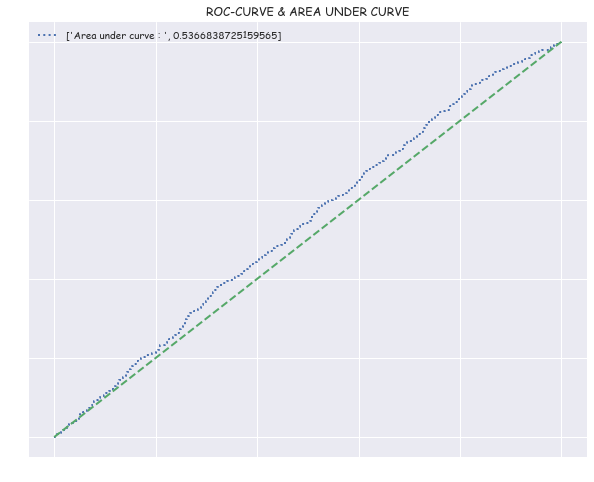

In [283]:
logit = LogisticRegression(penalty='l2')
model(logit, x_tr, y_tr, x_ts, y_ts,x_tr.columns)

<h3>Random Forest with Default Hyper Parameters</h3> 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy score :  0.5275080906148867
Recall score   :  0.43032329988851725
Precision score   :  0.5139813581890812
confusion matrix : 
 [[0.3193096  0.19687163]
 [0.27562028 0.20819849]]
classification report :
              precision    recall  f1-score   support

          0       0.54      0.62      0.57       957
          1       0.51      0.43      0.47       897

avg / total       0.53      0.53      0.52      1854



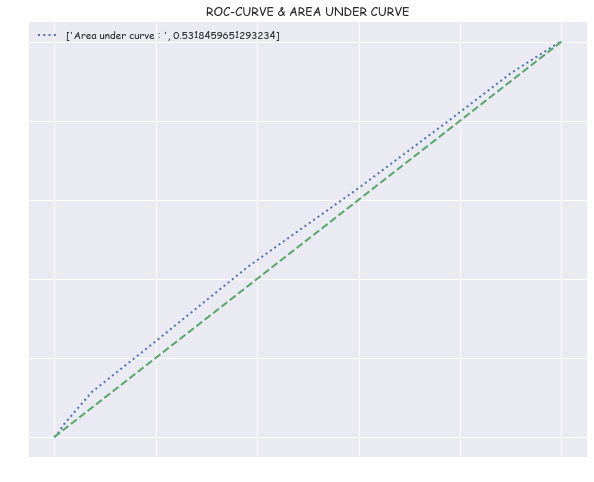

In [282]:
rfc = RandomForestClassifier()
model(rfc,x_tr, y_tr, x_ts, y_ts,x_tr.columns)

In [280]:
%%time
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
CPU times: user 2.01 ms, sys: 525 µs, total: 2.53 ms
Wall time: 2.15 ms


<h3>Random Forest with Tuned Hyper Parameters</h3>

In [208]:
param_grid = {
    'max_depth': [4,5,6,8,10,15],
    'min_samples_leaf': [4,8,10],
    'min_samples_split': [4,6,8],
    'n_estimators': [10, 30, 50]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid ,
                          cv = 10, n_jobs = -1, verbose = 2)

In [209]:
grid_search.fit(x_tr,y_tr)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, m

[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.1s
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=30 
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.5s


[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50, total=   0.2s
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=30

[CV] max_depth=4, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.2s
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV] max_depth=4, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=6, n_estimators=10, total=   0.1

[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.1s
[CV] max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.1s
[CV] max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=30 
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.1s
[CV] max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=30 
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.1s
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV] max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.1s
[CV] max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=50

[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=6, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=6, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=6, n_estimators=30, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=6, n_e

[CV] max_depth=4, min_samples_leaf=10, min_samples_split=8, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=8, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=8, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=8, n_estimators=50, total=   0.2s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=8, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=8, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=8, n_estimators=50, total

[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   14.6s


[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=30 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=30 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.2s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=30 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.2s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=30 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=30 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.2

[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_leaf=8, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=8, n_estimators=50, total=   0.3s
[CV] max_depth=5, min_samples_leaf=8, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_leaf=8, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_leaf=8, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=8, n_estimators=50, total=   0.3s
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=8, n_estimators=50, total=   0.3s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=8, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=4, n_estimators=1

[CV] max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=30, total=   0.2s
[CV] max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=30, total=   0.2s
[CV] max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=30 
[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=30, total=   0.2s
[CV] max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=30, total=   0.2s
[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=50 
[CV] max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=50, total=   0.3

[CV] max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=30 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=10, total=   0.1s
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=30 
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=30 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=30 
[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=8, n_estimators=50, t

[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=6, n_estimators=50 
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=8, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=8, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=8, n_estimators=10, total=   0.1s
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=6, n_estimators=50, total=   0.2s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=8, n_estimators=10 
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=8, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=8, n_estimators=10, 

[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=30, total=   0.2

[CV] max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10, total=   0.1s
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10, total=   0.1s
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10, total=   0.1

[CV] max_depth=6, min_samples_leaf=8, min_samples_split=4, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=4, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=4, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.3s
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=4, n_estimators=50 
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=6, n_estimators=10, total=   0.1

[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50

[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   34.7s


[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.3s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.3s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.3s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.3s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.3s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50

[CV] max_depth=6, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=6, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=6, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=6, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=6, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[

[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=8, n_estimators=50, total=   0.3s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=8, n_estimators=50, total=   0.3s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=8, n_estimators=50, total=   0.3s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=8, n_estimator

[CV] max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.2s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=30 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.2s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.2s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=50, total=   0.3

[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=30 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=30 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=30 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=30 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=30

[CV] max_depth=8, min_samples_leaf=8, min_samples_split=8, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=8, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=8, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=8, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=8, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=8, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=6, n_estimators=50, total=   0.3

[CV] max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=30 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=30 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=30, 

[CV] max_depth=8, min_samples_leaf=10, min_samples_split=8, n_estimators=10 
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=8, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=8, n_estimators=30 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=50, total=   0.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=8, n_estimators=10, total=   0.1s
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=8, n_estimators=10 
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=8, n_estimators=30 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=8, n_estimators=30 
[

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.7s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.4s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.6s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=6, n_e

[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30, 

[CV] max_depth=10, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=6, n_estimators=10, 

[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.5s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.3s
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.5s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.5s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.4s
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.4s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_e

[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:  1.2min


[CV] max_depth=10, min_samples_leaf=10, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=4, n_estimators=30, total=   0.3s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=4, n_estimators=30 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=4, n_estimators=30, total=   0.3s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=4, n_estimators=30 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=4, n_estimators=50, total=   0.4s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=4, n_est

[CV] max_depth=10, min_samples_leaf=10, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=6, n_estimators=50, total=   0.6s
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=8, n_estimators=10 
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=8, n_estimators=30 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=8, n_estimators=10, total=   0.1s
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=8, n_estimators=30 
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=8, n_estimators=30 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=8, n_est

[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.6s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.6s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.6s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=6, n_e

[CV] max_depth=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=6, n_estimators=50, total=   0.8s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.6s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.6s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.4s
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.4s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=8, n_estimators=50 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30, 

[CV] max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=10, total=   0.2s
[CV] max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.6s
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV] max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.7s
[CV] max_depth=15, min_samples_leaf=8, min_samples_split=4, n_estimators=50 
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=10, total=   0.2s
[CV] max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=30 
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=10, 

[CV] max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.3s
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.5s
[CV] max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV] max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.5s
[CV] max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.4s
[CV] max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.4s
[CV] max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50, 

[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=10, total=   0.1s
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=15, min_samples_leaf=10, min_samples_

[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=8, n_estimators=50, total=   0.5s
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=8, n_estimators=50, total=   0.4s
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=8, n_estimators=50, total=   0.4s
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=8, n_estimators=50, total=   0.4s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=8, n_estimators=50 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=8, n_estimators=50, total=   0.3s


[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  1.8min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 5, 6, 8, 10, 15], 'min_samples_leaf': [4, 8, 10], 'min_samples_split': [4, 6, 8], 'n_estimators': [10, 30, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [210]:
grid_search.best_params_

{'max_depth': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 50}

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy score :  0.5312837108953614
Recall score   :  0.7313266443701226
Precision score   :  0.5109034267912772
confusion matrix : 
 [[0.17745415 0.33872708]
 [0.12998921 0.35382956]]
classification report :
              precision    recall  f1-score   support

          0       0.58      0.34      0.43       957
          1       0.51      0.73      0.60       897

avg / total       0.55      0.53      0.51      1854



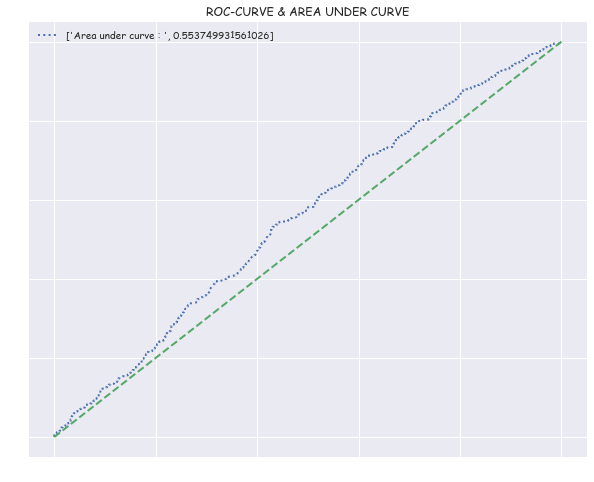

In [285]:
rfc2 = RandomForestClassifier(max_depth = grid_search.best_params_['max_depth'], 
                              min_samples_leaf = grid_search.best_params_['min_samples_leaf'], 
                              min_samples_split = grid_search.best_params_['min_samples_split'],
                              n_estimators = grid_search.best_params_['n_estimators'])
model(rfc2,x_tr, y_tr, x_ts, y_ts,x_tr.columns)

In [230]:
def evaluate(model, x_ts, y_ts):
    predictions = model.predict(x_ts)
    errors = abs(predictions - y_ts)
    mape = 100 * np.mean(errors)
    accuracy = 100 - mape
    print (mape)
    print('Model Performance')
    
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.4f}.'.format(accuracy))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(x_tr,y_tr)
base_accuracy = evaluate(base_model, x_ts, y_ts)

48.43581445523193
Model Performance
Average Error: 0.4844 degrees.
Accuracy = 51.5642.


In [231]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_ts, y_ts)

46.87162891046386
Model Performance
Average Error: 0.4687 degrees.
Accuracy = 53.1284.


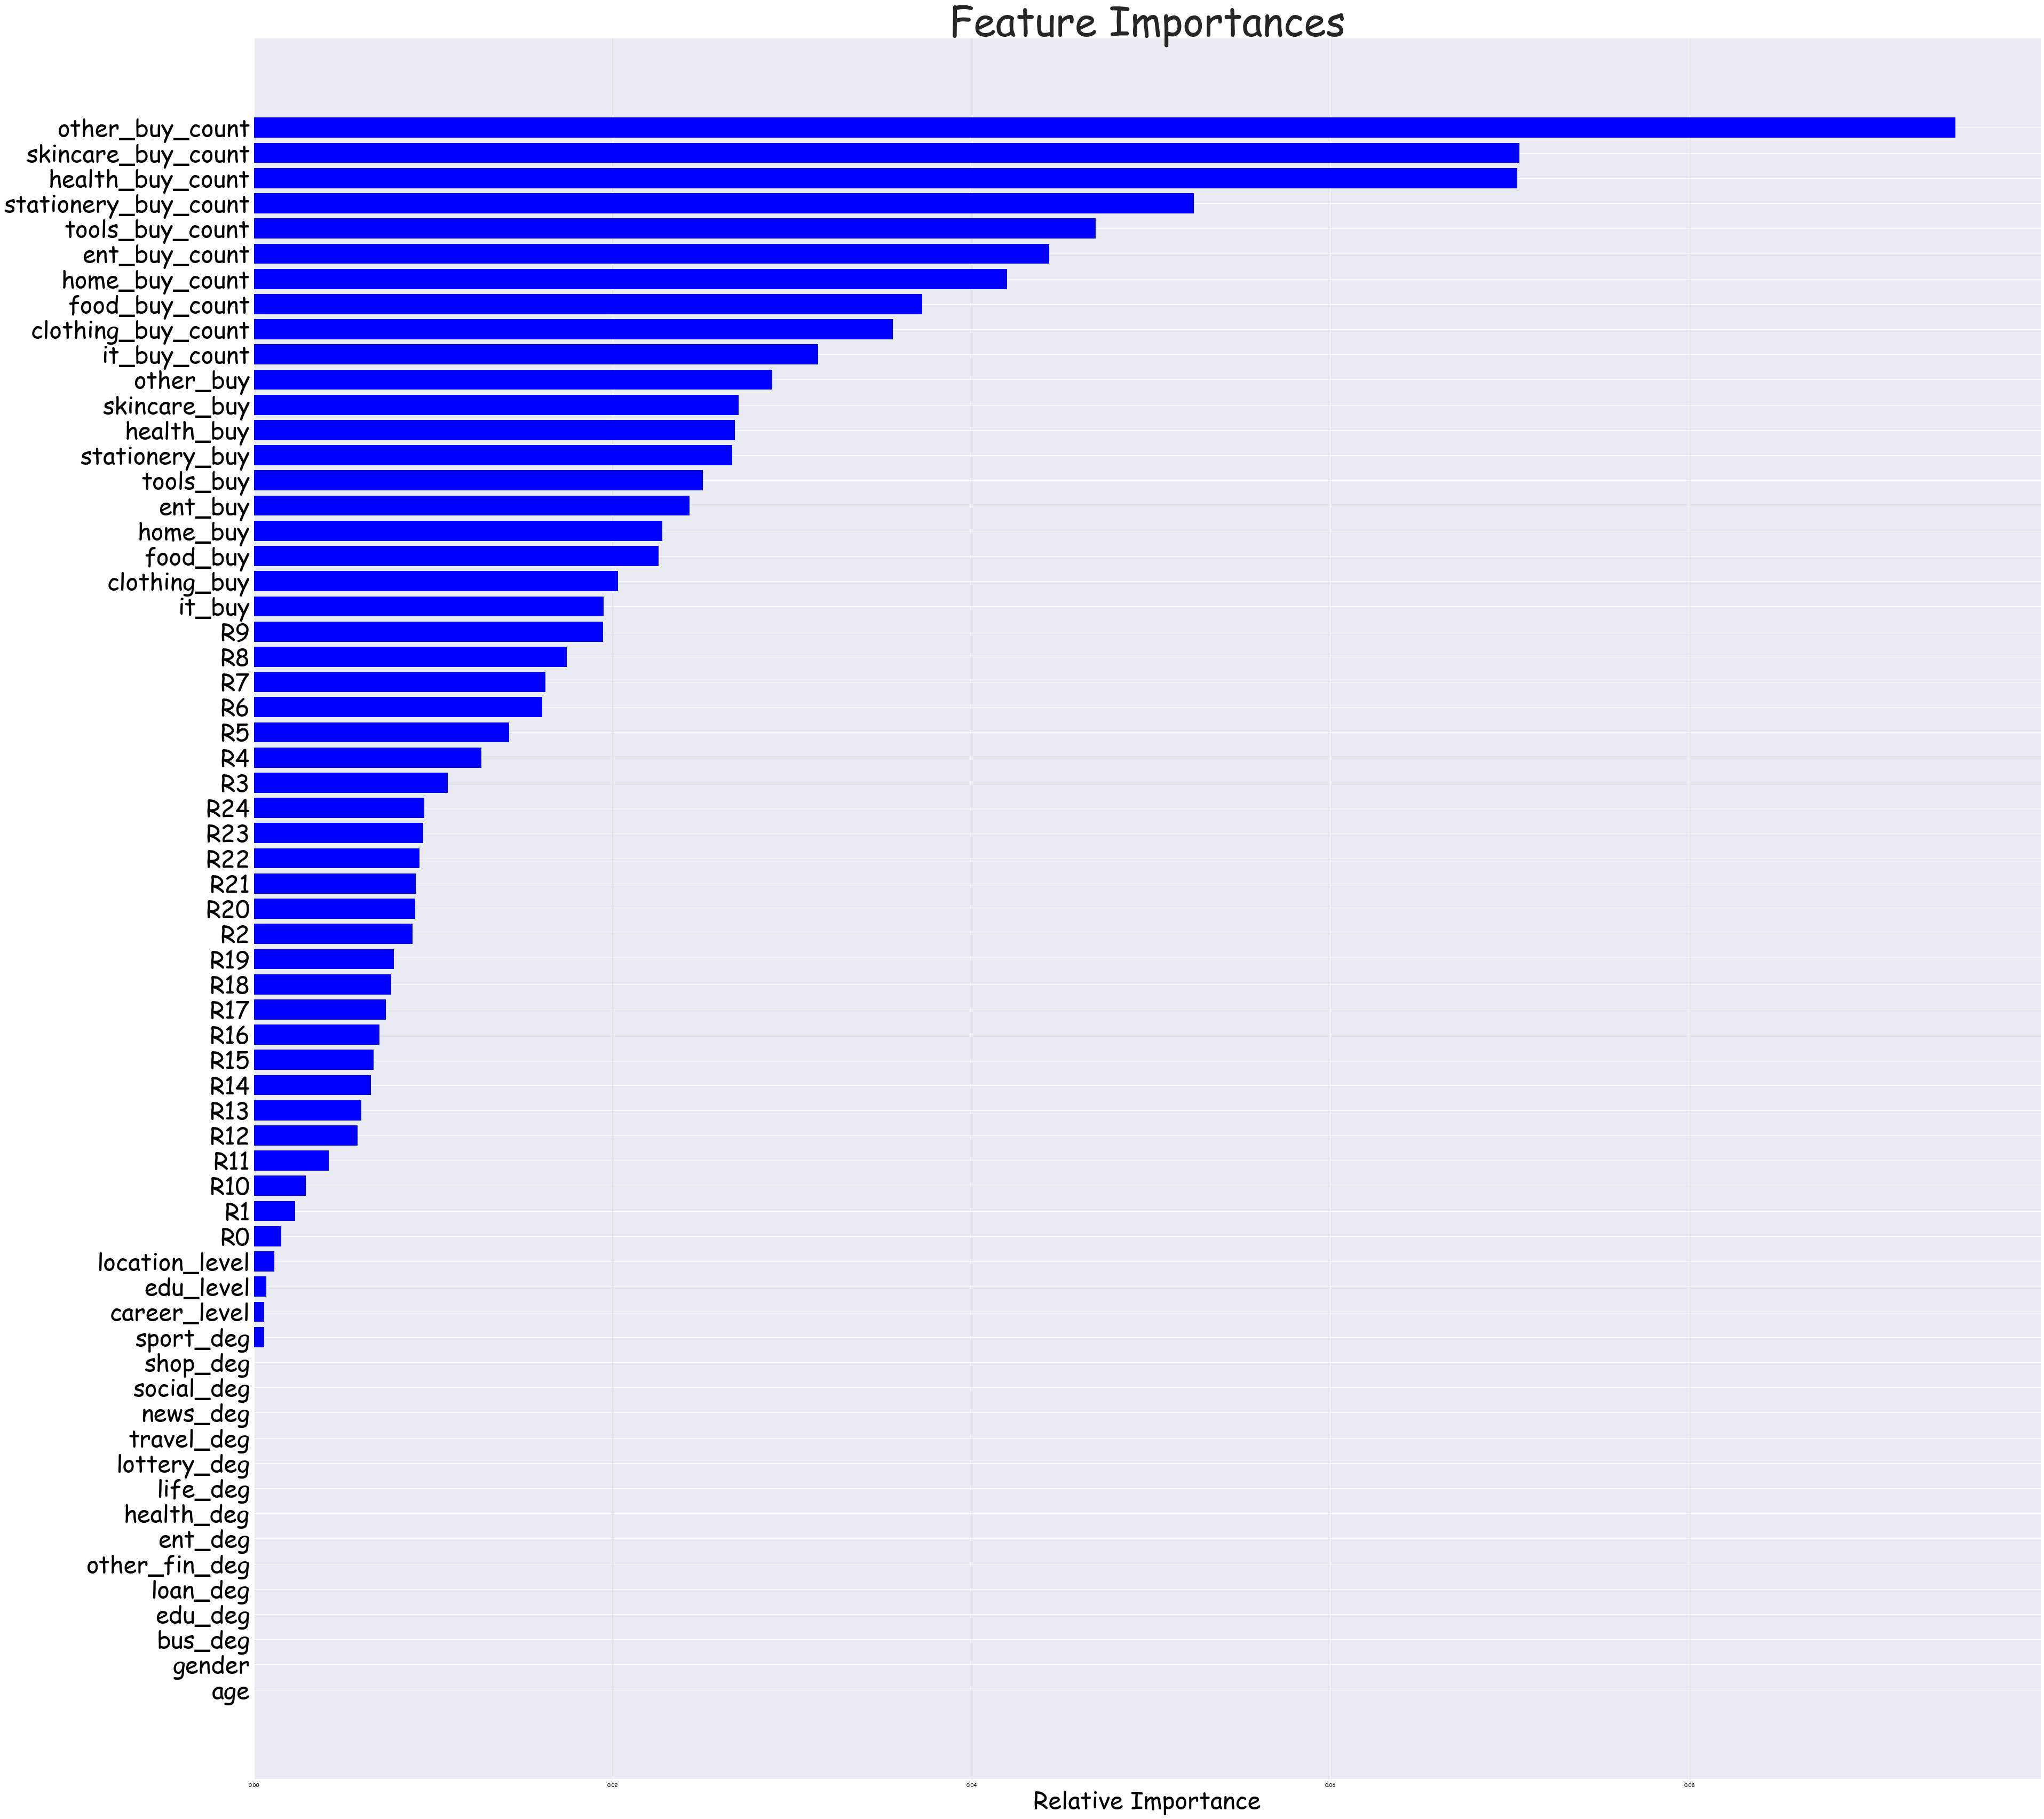

In [292]:
# feature importance for the tuned random forest
imp = best_grid.feature_importances_
feature_names = x_tr.columns
indices = np.argsort(imp)
font = {'family' : 'Comic Sans MS',
        'size'   : 40}
matplotlib.rc('font', **font)
plt.figure(figsize=(60,60))
plt.title('Feature Importances', fontsize=75)
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), feature_names, fontsize=45)
plt.xlabel('Relative Importance',fontsize=45)
params = {"ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}
plt.rcParams.update(params)
plt.show()